# Simple keywords cloud

***

#### Todo:
- bring keywords from more languages
- urls list in a better way?
- a cleaner function for the results is needed

In [146]:
import re
import keyword
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [147]:
# List of usable urls to extract the keywords
urls = {
    'c#': {
        "url": "https://learn.microsoft.com/en-us/dotnet/csharp/language-reference/keywords/",
        "tag": "code"
    },
    'c++': {
        "url": "https://learn.microsoft.com/en-us/cpp/cpp/keywords-cpp",
        "tag": "code"
    },
    't-sql': {
        "url": "https://learn.microsoft.com/en-us/sql/t-sql/language-elements/reserved-keywords-transact-sql",
        "tag": "p"
    },
    'javascript': {
        "url": "https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Lexical_grammar#keywords",
        "tag": "code"
    }
}

In [148]:
def get_keywords(language: str):
    """ get the keywords from given link

    :param language: the language we want to return the keywords for
    :return: a list of keywords in the given language
    """

    lang = language.lower()
    result = []

    # we can return the python keywords directly from python
    if lang == 'python':
        return keyword.kwlist

    x = lambda x: len(re.findall(r'\w+', str(x)))

    # else we can open the page for each of the listed languages
    if lang in urls:
        page = urlopen(urls[lang]['url'])
        html = page.read().decode("utf-8")
        soup = BeautifulSoup(html, "html.parser")

        return [c.string for c in soup.find_all(urls[lang]['tag']) if (x(c.string) == 1 and c.string is not None)]
    
    return []

In [149]:
def generate_cloud(languages: set, highlights: dict = {}):
    """ function using Wordcloud to generate a... word cloud

    :param languages: a set of languages, these have to be one of the existing ones listed in the `urls`
    :param highlights: optional parameter to pass a dictionary of words and their weight to be added in the word cloud
    """

    # Create the dictionary starting with the highlights
    keywords = {        
        'highlights': [k for k in highlights for _ in range(highlights[k])]
    }

    # Create a dictionary of the languages
    for lang in languages:
        keywords[lang] = get_keywords(lang)

    # Join the full text
    txt = ' '.join([v for k in keywords for v in keywords[k] if not v is None])

    if len(txt) > 1:
        # Generate a word cloud image (1584x396 is the LinkedIn profile background recommended size):
        wordcloud = WordCloud(
            width=1584,
            height=396,
            background_color='white',
            collocations=False
        )
        wordcloud.generate(txt)

        # Display the generated image:
        plt.figure( figsize=(20,10) )
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()    
    else:
        raise Exception("We need at least 1 word to plot a word cloud, got 0.")

['\\s', '_', '\\u0000', '你好', 'async', 'async', 'await', 'let', 'const', 'let', 'break', 'case', 'catch', 'class', 'const', 'continue', 'debugger', 'default', 'delete', 'do', 'else', 'export', 'extends', 'false', 'finally', 'for', 'function', 'if', 'import', 'in', 'instanceof', 'new', 'null', 'return', 'super', 'switch', 'this', 'throw', 'true', 'try', 'typeof', 'var', 'void', 'while', 'with', 'let', 'const', 'let', 'static', 'yield', 'await', 'enum', 'implements', 'interface', 'package', 'private', 'protected', 'public', 'abstract', 'boolean', 'byte', 'char', 'double', 'final', 'float', 'goto', 'int', 'long', 'native', 'short', 'synchronized', 'throws', 'transient', 'volatile', 'arguments', 'as', 'async', 'eval', 'from', 'get', 'of', 'set', 'null', '0', '0', '0', '0o', 'beN', 'b', 'E', 'e', 'N', '0b', '0B', '0b', 'SyntaxError', '0o', '0O)', '0o', 'SyntaxError', '0x', '0X', 'SyntaxError', 'n', 'BigInt', 'BigInt', 'BigInt', '_', 'Object', 'Array', '\\x', '\\u', '\\u{', 'RegExp', 'let', 

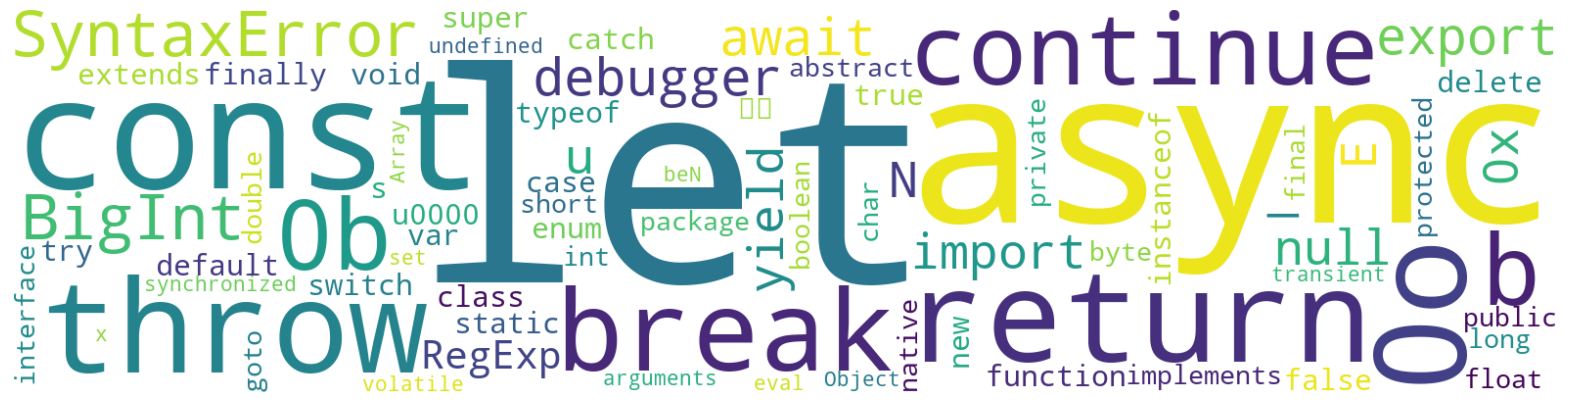

In [150]:
# Entry point
if __name__ == "__main__":

    # Few keywords to highlight and their weight
    highlights = {
        'DataEngineer': 30,
        'SQLServer': 10,
        'TSQL': 10,
        'ETL': 10,
        'Python': 6,
        'Pandas': 4,
        'FastAPI': 6,
        'CSharp': 5
    }

    languages = {'python', 't-sql', 'c#'}

    generate_cloud(languages, highlights)